In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder #preprocessing
from sklearn.model_selection import train_test_split #training and testing
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score #evaluation 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
import warnings
warnings.simplefilter("ignore")

# 1. Data Preparation

# Setting column names when importing data into a Pandas DataFrame

In [2]:
column_names ='A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16'.split(",")
df = pd.read_csv('data.data',delimiter=',',names = column_names)

In [3]:
#Checking the first 5 rows of the dataframe
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


# Writing the resulting data frame to a csv file

In [4]:
df.to_csv('amunezer_project.csv', index=False)

In [5]:
data = pd.read_csv('amunezer_project.csv')

# Exploratory Data Analysis

In [6]:
# Summary of the dataset
data.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


# Check the distribution of target class

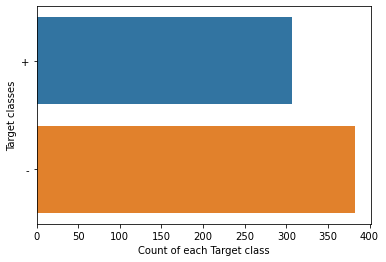

In [8]:
sns.countplot(y=data["A16"] ,data=data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

# Checking the distribution data within the features

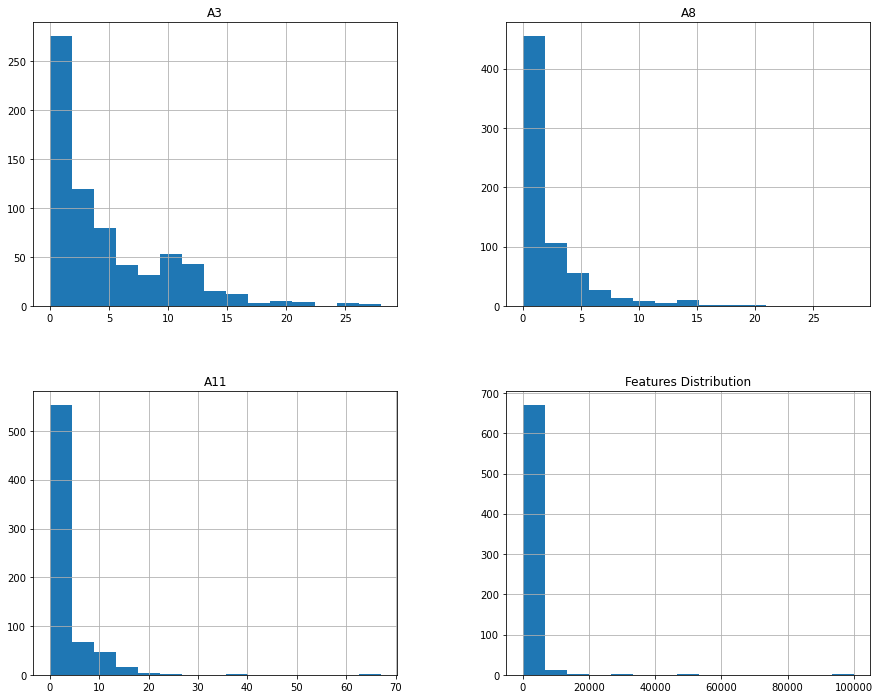

In [9]:
data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

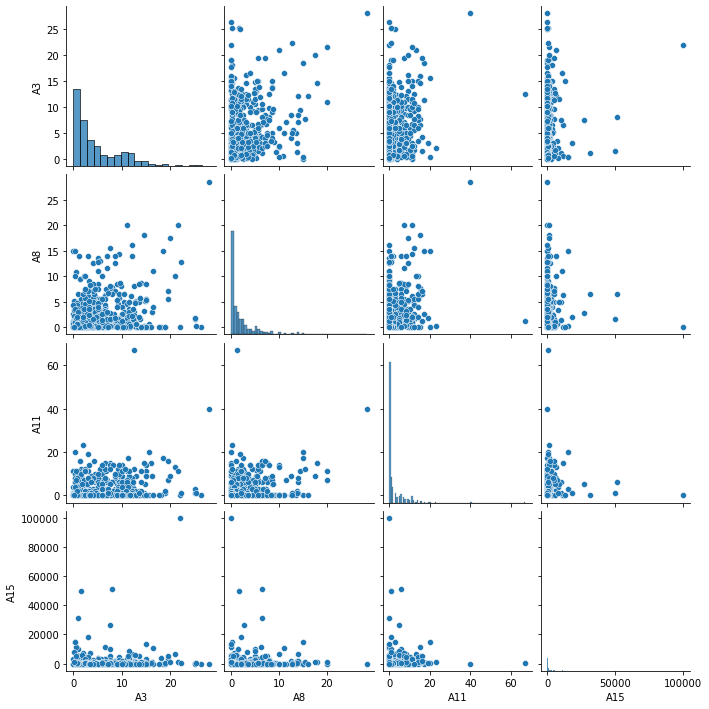

In [10]:
sns.pairplot(data)

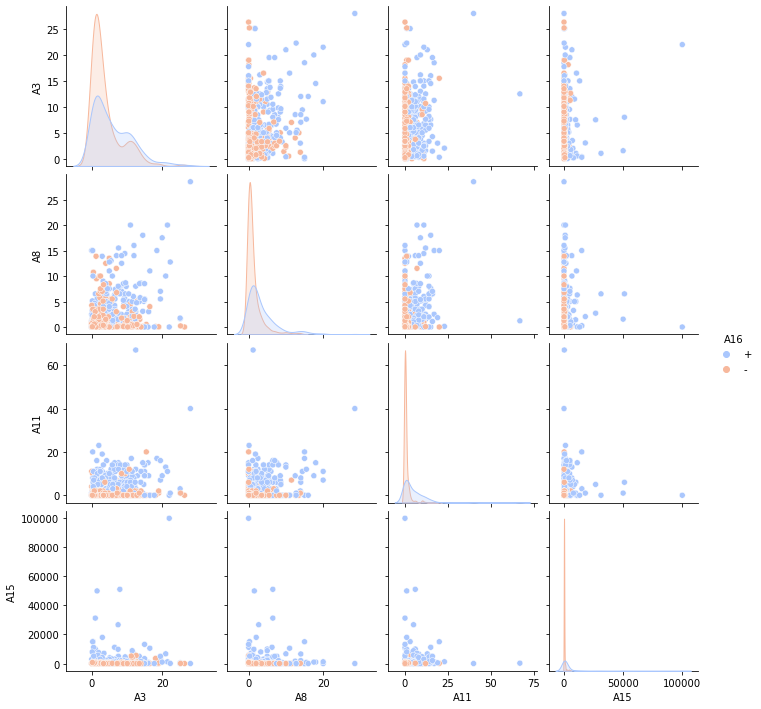

In [11]:
sns.pairplot(data,hue='A16',palette='coolwarm')

# Checking for missing values and other unexpected characters in our categorical columns

In [12]:
list_categorical ='A1,A4,A5,A6,A7,A9,A10,A12,A13,A16'.split(',')
list_continuous = 'A2,A3,A8,A11,A14,A15'.split(',')

# Computing the count of values within a column

In [13]:
for i in column_names:
    print(i)
    print('\n')
    print(data[i].value_counts())
    print('\n')

A1


b    468
a    210
?     12
Name: A1, dtype: int64


A2


?        12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: A2, Length: 350, dtype: int64


A3


1.500     21
0.000     19
3.000     19
2.500     19
0.750     16
          ..
0.085      1
12.250     1
11.045     1
11.125     1
3.375      1
Name: A3, Length: 215, dtype: int64


A4


u    519
y    163
?      6
l      2
Name: A4, dtype: int64


A5


g     519
p     163
?       6
gg      2
Name: A5, dtype: int64


A6


c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: A6, dtype: int64


A7


v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: A7, dtype: int64


A8


0.000    70
0.250    35
0.040    33
1.000    31
0.125    30
         ..
4.165     1
9.000     1
1.960     1
5.125     1
8.290     1

In [14]:
data = data.replace('?',np.nan)

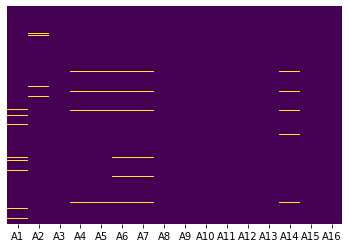

In [15]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

# Handling NAN in categorical columns by filling them with the mode

In [16]:
for i in list_categorical: 
    data[i] = data[i].fillna(data[i].mode()[0])

# Filling NAN in Numerical values with the mean

In [17]:
for i in list_continuous:
    data = data.astype({i: float})
    data[i]= data[i].fillna(data[i].mean())

# Checking Again for Null values using heatmap

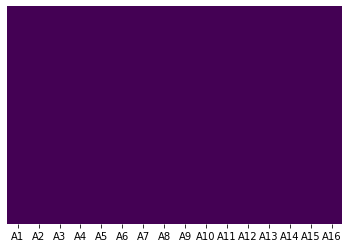

In [18]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

# Checking for Outliers in continuous columns using Boxplot

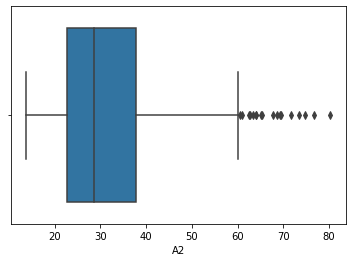

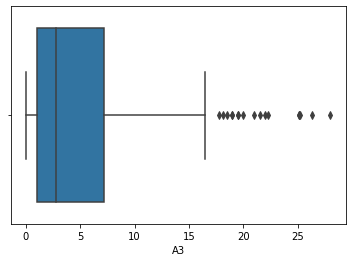

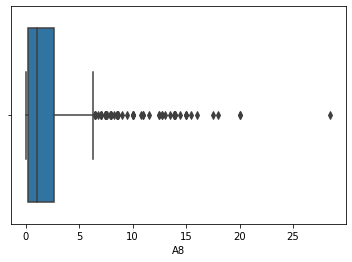

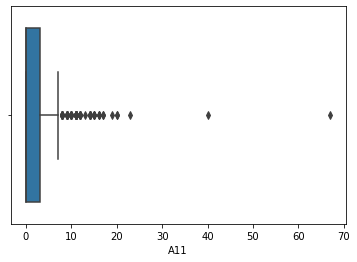

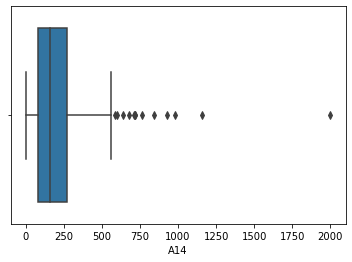

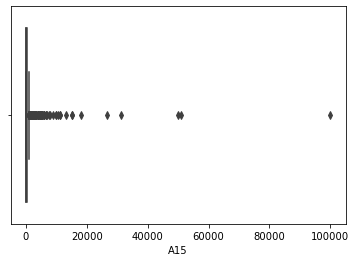

In [19]:
for i in list_continuous:
    sns.boxplot(data[i])
    plt.show()

# Counting outliers per columns using Z score

In [20]:
#Three standard deviations from the mean
threshold = 3
for i in list_continuous:
    outlier = []
    for val in data[i]:
        z = np.abs(val-np.mean(data[i]))/np.std(data[i])
        if z > threshold:
            outlier.append(val)
    print('The number of outliers in column {} are {}'.format(i,len(outlier)))
    #print("The outliers are:",outlier)

The number of outliers in column A2 are 9
The number of outliers in column A3 are 10
The number of outliers in column A8 are 22
The number of outliers in column A11 are 8
The number of outliers in column A14 are 9
The number of outliers in column A15 are 6


In [21]:
#It can be seen that the above columns don't contain a big number of outliers. Therefore, I considered to keep them since
#they are few, so their number cannot cause any massive impact to our data.

# Dealing with Categorical attributes by perfoming One hot Encoding

# Performing one hot encoding to categorical values

In [22]:
def one_hot_encoding(df, list_categorical):
    dummies = pd.get_dummies(df[list_categorical],prefix=list_categorical, drop_first=True)
    res = pd.concat([df.drop(list_categorical,axis=1), dummies], axis=1)
    return(res)

In [23]:
data = one_hot_encoding(data,list_categorical)

In [24]:
data.columns

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1_b', 'A4_u', 'A4_y', 'A5_gg',
       'A5_p', 'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j',
       'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_dd', 'A7_ff',
       'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A9_t', 'A10_t',
       'A12_t', 'A13_p', 'A13_s', 'A16_-'],
      dtype='object')

In [25]:
data.head()

,A2,A3,A8,A11,A14,A15,A1_b,A4_u,A4_y,A5_gg,...,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s,A16_-
0,30.83,0.000,1.25,1.0,202.0,0.0,1,1,0,0,...,0,0,1,0,1,1,0,0,0,0
1,58.67,4.460,3.04,6.0,43.0,560.0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,24.50,0.500,1.50,0.0,280.0,824.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,27.83,1.540,3.75,5.0,100.0,3.0,1,1,0,0,...,0,0,1,0,1,1,1,0,0,0
4,20.17,5.625,1.71,0.0,120.0,0.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [26]:
X= data.iloc[:,:-1]
y = data.iloc[:,-1]

# Selecting features to be used using LASSO 

In [27]:
pipeline = Pipeline([('model',Lasso())])
lambda_ = np.logspace(-2,1)
search = GridSearchCV(pipeline,{'model__alpha':lambda_},
cv = 10, scoring="neg_mean_squared_error")
search.fit(X,y)
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
coefficients
to_positive_Coefficients = np.abs(coefficients)
to_positive_Coefficients

array([3.18783546e-04, 1.70955860e-03, 9.06219556e-03, 1.11069819e-02,
       1.53858631e-04, 1.07869031e-05, 0.00000000e+00, 0.00000000e+00,
       3.14795513e-02, 0.00000000e+00, 7.13429541e-18, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.58906995e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.75911338e-02,
       0.00000000e+00, 0.00000000e+00, 8.50545956e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.63140106e-01, 8.39250019e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [28]:
All_red_features = X.columns
X_selected = [i for i in np.array(All_red_features)[to_positive_Coefficients != 0]]

In [29]:
X_selected

['A2',
 'A3',
 'A8',
 'A11',
 'A14',
 'A15',
 'A4_y',
 'A5_p',
 'A6_ff',
 'A6_x',
 'A7_h',
 'A9_t',
 'A10_t']

# Checking the correlation of all features with the target, to confirm that the features selected by lasso were worth to be selected

[]

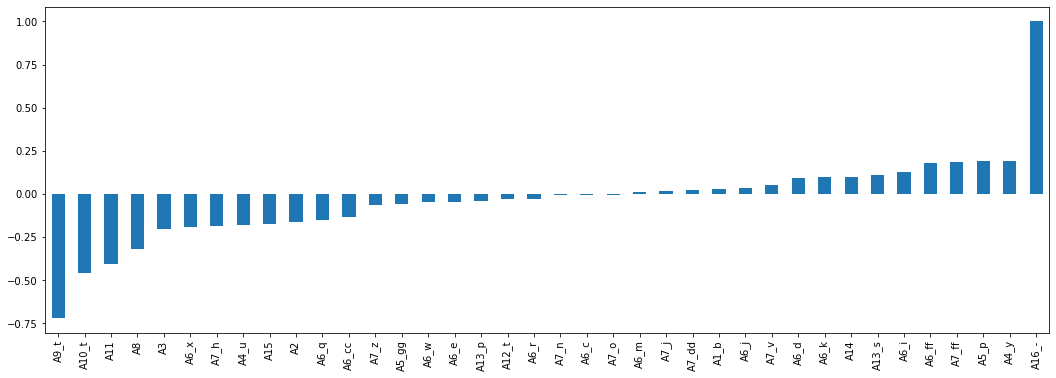

In [30]:
data.corr()["A16_-"].sort_values().plot(kind='bar',figsize=(18,6))
plt.plot()

In [31]:
X = X[X_selected]

# Building a Neural network based model

In [32]:
#Cross Validation
#Number of K Folds
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [33]:
from sklearn.neural_network import MLPClassifier

In [34]:
#A Multi Layer Perceptron Classifier with default parameters

#Fitting the model
model = MLPClassifier(random_state=42)
model.fit(X,y)

mlp_CV_Scores = [np.mean(cross_val_score(model, X, y, cv=cv, scoring="precision")),
 np.mean(cross_val_score(model, X, y, cv=cv, scoring="f1"))]

print("The computed precision is :",mlp_CV_Scores[0])
print("The computed F1:",mlp_CV_Scores[1])

The computed precision is : 0.7583585786696386
The computed F1: 0.7965713559544408


In [35]:
hyperparams={'Multi layer Perceptron':
                 {'model':MLPClassifier(),
                  'params':{
                    'hidden_layer_sizes': [(150,200,50),(100,50,50), (300,200,40)],
                    'activation':['tanh', 'relu','identity'],
                      'batch_size':[312],
                   'solver':['sgd', 'adam','lbfgs'],
                     'alpha': [0.0001, 0.05],
                      'random_state':[1],
                      'learning_rate':['constant','adaptive','invscaling']
                    }
                 }
            }

In [36]:
accuracy_values=[]
for key in hyperparams.keys():
    g_search=GridSearchCV(hyperparams[key]['model'],hyperparams[key]['params'],
                          cv=10,return_train_score=False,verbose=0)
    g_search.fit(X,y)

    accuracy_values.append({'model':key,
                            'best_score':g_search.best_score_,
                            'best_params':g_search.best_params_
                            
                           })

In [37]:
pd.set_option('display.max_colwidth', None)
accuracy_df=pd.DataFrame(accuracy_values)
accuracy_df

,model,best_score,best_params
0,Multi layer Perceptron,0.852174,"{'activation': 'identity', 'alpha': 0.0001, 'batch_size': 312, 'hidden_layer_sizes': (150, 200, 50), 'learning_rate': 'constant', 'random_state': 1, 'solver': 'lbfgs'}"


# Building a turned model using the selected parameters


In [42]:
#A Multi Layer Perceptron Classifier

#Fitting the model with the best parameters computed in hyperparameter turning
model = MLPClassifier(hidden_layer_sizes = (150,200,50),activation = 'relu',alpha= 0.0001,batch_size =312,learning_rate='constant',solver='lbfgs', random_state=1)
model.fit(X,y)

mlp_turned_CV_Scores = [np.mean(cross_val_score(model, X, y, cv=cv, scoring="precision")),
 np.mean(cross_val_score(model, X, y, cv=cv, scoring="f1"))]

print("The computed Precision:",mlp_turned_CV_Scores[0])
print("The computed F1:",mlp_turned_CV_Scores[1])

The computed Precision: 0.7719720426985451
The computed F1: 0.8028680855921653


# Plotting the comparision between the default and Fine Tuned model using Cross-Validation

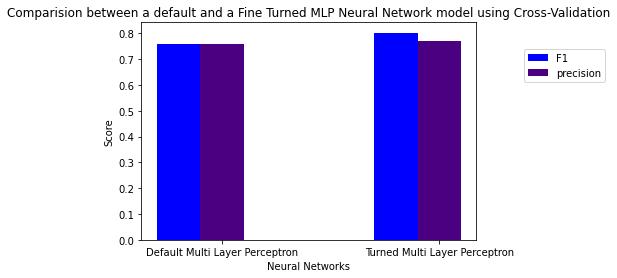

In [43]:
precisions = [mlp_CV_Scores[0], mlp_turned_CV_Scores[0]]
f1s = [mlp_CV_Scores[0], mlp_turned_CV_Scores[1]]
neural_network = ["Default Multi Layer Perceptron", "Turned Multi Layer Perceptron"]

X_axis = np.arange(len(neural_network))
plt.xticks(X_axis, neural_network)
plt.bar(X_axis - 0.2, f1s, 0.2, label = 'F1', color='blue')
plt.bar(X_axis , precisions, 0.2, label = 'precision', color='indigo')
plt.xlabel("Neural Networks")
plt.ylabel("Score")
plt.title("Comparision between a default and a Fine Turned MLP Neural Network model using Cross-Validation")
plt.legend(bbox_to_anchor=(0.5, 0.2, 0.9, 0.7))
plt.show()